# Includes

In [1]:
import mplfinance as mpf
import pandas as pd

from data_proc import DataProc, DEF_INTERVAL, DEF_SYMBOL, SYMBOLS, INTERVALS, TOTAL_CANDLES
from capture_plot import CaptureOnClick

%matplotlib widget

print(mpf.__version__)

0.12.10b0


In [2]:

print(f"Intervals: {' '.join(SYMBOLS)}\nSymbols: {' '.join(INTERVALS)}\nDefaults: symbol={DEF_SYMBOL}, interval={DEF_INTERVAL}")


Intervals: BTCUSDT ETHUSDT SOLUSDT AVAXUSDT
Symbols: 1m 3m 5m 15m 30m 1h 2h 4h 6h 8h 12h 1d 3d 1w 1M
Defaults: symbol=BTCUSDT, interval=15m


# Simple flow

## Initialize data processor

>- new symbols(pairs) can be added to SYMBOLS in data_proc to extended datastore structure 
>- bnc_key, bnc_sec need to be set for Binance API access

In [3]:
#initialize data processor
dp = DataProc('.\\.data\\v0.06a\\')

print(dp)

## Aquire selections
* Left click places buy mark
* Right click places sell mark
* Alt+Right click removes the nearest mark

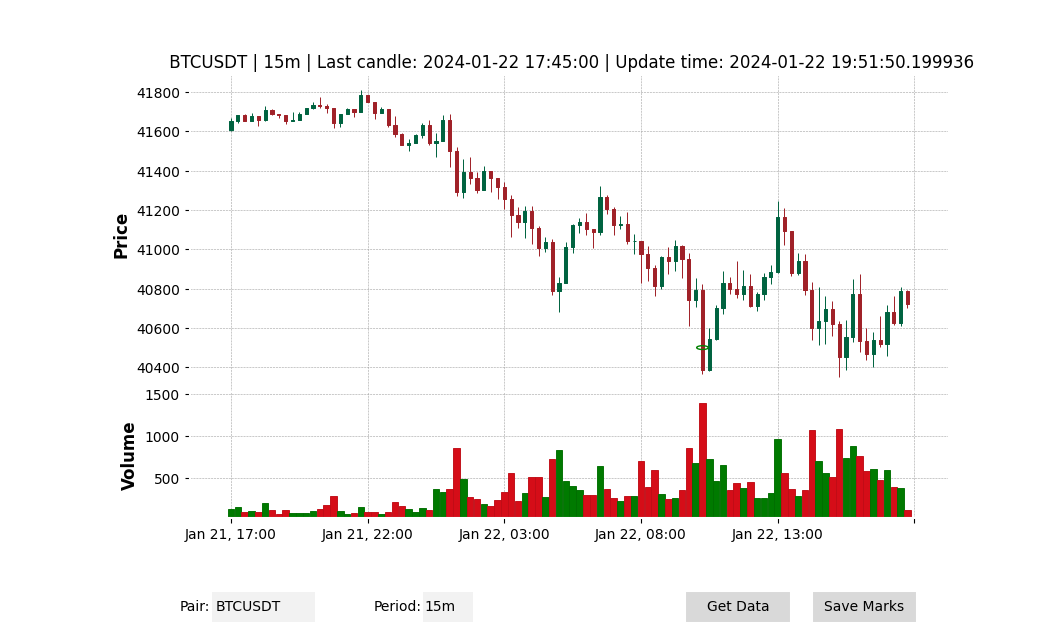

In [4]:
plt = CaptureOnClick(data_proc=dp)

# Utils 
* Load data (from Binance)
* Show collected symbols(pairs)/intervals
* Print debug output (captured over the plot)
* See into data details
  

In [5]:
#get_data adds the requested pair/interval to the datastore and sets dp.pair_df
dp.get_data('BTCUSDT', '4h')
print(dp.pair_df[0:5])

                         Open      High       Low     Close      Volume
Date                                                                   
2024-01-06 04:00:00  43931.10  43971.10  43397.05  43653.20  4242.79756
2024-01-06 08:00:00  43653.20  43771.10  43551.28  43671.96  2449.54997
2024-01-06 12:00:00  43671.97  43920.08  43527.27  43867.17  2610.13838
2024-01-06 16:00:00  43867.17  44148.58  43828.50  43906.36  2971.24432
2024-01-06 20:00:00  43906.35  43980.00  43611.19  43968.32  2437.86928


In [6]:
df = pd.DataFrame(dp.data_map)

#show non empty pair/interval data
for pair, intervals in df.items():
        for interval, values in intervals.items():
            if values['Updated'] is not None:
                print(f"Pair: {pair}, Interval: {interval}, StartDate: {values['StartDate']}, Updated: {values['Updated']}")

Pair: BTCUSDT, Interval: 1m, StartDate: 2024-01-22 16:12:00, Updated: 2024-01-22 19:51:56.625170
Pair: BTCUSDT, Interval: 15m, StartDate: 2024-01-21 17:00:00, Updated: 2024-01-22 19:51:50.199936
Pair: BTCUSDT, Interval: 30m, StartDate: 2024-01-20 16:00:00, Updated: 2024-01-22 19:52:00.512596
Pair: BTCUSDT, Interval: 1h, StartDate: 2024-01-18 14:00:00, Updated: 2024-01-22 19:52:06.941759
Pair: BTCUSDT, Interval: 4h, StartDate: 2024-01-06 04:00:00, Updated: 2024-01-22 19:52:24.095668
Pair: BTCUSDT, Interval: 8h, StartDate: 2023-12-20 16:00:00, Updated: 2024-01-22 19:52:19.617797


In [7]:
print(plt.captured_output)

Loaded on plot: BTCUSDT at 4h at 2024-01-22 16:00:00


In [8]:

#datamap initialized with SYMBOLS entries  each may hold OCHL data in corresponding interval from INTERVALS 
datamap = pd.DataFrame(dp.data_map)

#data is accumulated here
datastore = pd.DataFrame(dp.pair_df_store)

#get one TOTAL_CANDLES set of OCHL+Volume for 
pair_df = pd.DataFrame(datastore[DEF_SYMBOL][DEF_INTERVAL])

#default load:
last_updated = datamap[DEF_SYMBOL][DEF_INTERVAL]['Updated']
start_date = datamap[DEF_SYMBOL][DEF_INTERVAL]['StartDate']
end_date = datamap[DEF_SYMBOL][DEF_INTERVAL]['EndDate']


print (f'\nwe have: {TOTAL_CANDLES} candles of {dp.pair} at {dp.interval}, between: {start_date} and {end_date}, \nloaded on {last_updated}  \n')
print(datamap.shape, datastore.shape, pair_df.shape, '\n')
print(pair_df.index[0:5], '\n')
print(pair_df[0:5], '\n')


we have: 100 candles of BTCUSDT at 4h, between: 2024-01-21 17:00:00 and 2024-01-22 17:45:00, 
loaded on 2024-01-22 19:51:50.199936  

(15, 4) (15, 4) (100, 5) 

DatetimeIndex(['2024-01-21 17:00:00', '2024-01-21 17:15:00',
               '2024-01-21 17:30:00', '2024-01-21 17:45:00',
               '2024-01-21 18:00:00'],
              dtype='datetime64[ns]', name='Date', freq=None) 

                         Open      High       Low     Close     Volume
Date                                                                  
2024-01-21 17:00:00  41607.18  41669.53  41599.39  41651.80  133.81573
2024-01-21 17:15:00  41651.80  41684.26  41639.88  41684.25  146.06643
2024-01-21 17:30:00  41684.26  41690.00  41652.67  41652.68   98.21161
2024-01-21 17:45:00  41652.68  41695.07  41652.67  41678.00  103.57750
2024-01-21 18:00:00  41677.99  41678.00  41627.00  41655.00   89.86990 



In [ ]:
del pd
del plt